In [8]:
!pip install git+https://github.com/deepvision-class/starter-code

  Cloning https://github.com/deepvision-class/starter-code to /tmp/pip-req-build-0mds_lnx
  Running command git clone -q https://github.com/deepvision-class/starter-code /tmp/pip-req-build-0mds_lnx
  Created wheel for Colab-Utils: filename=Colab_Utils-0.1.dev0-cp36-none-any.whl size=10324 sha256=7b7ce57b0014c48470ae1b977e7a70764881d435170493841ee3759d25a1f74a
  Stored in directory: /tmp/pip-ephem-wheel-cache-slqvox5w/wheels/63/d1/27/a208931527abb98d326d00209f46c80c9d745851d6a1defd10
Successfully built Colab-Utils


In [9]:
from __future__ import print_function
from __future__ import division

import torch
import coutils
import random
import math
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# for plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [10]:
if torch.cuda.is_available:
  print('Good to go!')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

Good to go!


In [11]:
def get_toy_data(num_inputs=5, input_size=4, hidden_size=10, num_classes=3, dtype=torch.float32):
    N = num_inputs
    D = input_size
    H = hidden_size
    C = num_classes

    coutils.utils.fix_random_seed()

    params = {}
    params['W1'] = 1e-4 * torch.randn(D, H, device='cuda').to(dtype)
    params['b1'] = torch.zeros(H, device='cuda').to(dtype)
    params['W2'] = 1e-4 * torch.randn(H, C, device='cuda').to(dtype)
    params['b2'] = torch.zeros(C, device='cuda').to(dtype)

    toy_X = 10.0 * torch.randn(N, D, device='cuda').to(dtype)
    toy_y = torch.tensor([0, 1, 2, 2, 1], dtype=torch.int64, device='cuda')

    return toy_X, toy_y, params

In [12]:
def nn_loss_part1(params, X, y=None, reg=0.0):
    W1, b1 = params['W1'], params['b1']
    W2, b2 = params['W2'], params['b2']
    N, D = X.shape

    hidden = None
    scores = None

    hidden = torch.mm(X, W1) + b1
    hidden = torch.max(torch.zeros_like(hidden), hidden)
    scores = torch.mm(hidden, W2) + b2

    return scores, hidden

In [13]:
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(a + torch.tensor([1,2,3]).view(-1,1))

tensor([[ 2,  3,  4],
        [ 6,  7,  8],
        [10, 11, 12]])


In [14]:
toy_X, toy_y, params = get_toy_data()

scores, _ = nn_loss_part1(params, toy_X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = torch.tensor([
        [-3.8160e-07,  1.9975e-07,  1.0911e-07],
        [-5.0228e-08,  1.2784e-07, -5.2746e-08],
        [-5.9560e-07,  9.1178e-07,  1.1879e-06],
        [-3.2737e-08,  1.8820e-07, -2.8079e-07],
        [-1.9523e-07,  2.0502e-07, -6.0692e-08]], dtype=torch.float32, device=scores.device)
print(correct_scores)
print()

# The difference should be very small. We get < 1e-10
scores_diff = (scores - correct_scores).abs().sum().item()
print('Difference between your scores and correct scores: %.2e' % scores_diff)

Your scores:
tensor([[ 9.7003e-08, -1.1143e-07, -3.9961e-08],
        [-7.4297e-08,  1.1502e-07,  1.5685e-07],
        [-2.5860e-07,  2.2765e-07,  3.2453e-07],
        [-4.7257e-07,  9.0935e-07,  4.0368e-07],
        [-1.8395e-07,  7.9303e-08,  6.0360e-07]], device='cuda:0')

correct scores:
tensor([[-3.8160e-07,  1.9975e-07,  1.0911e-07],
        [-5.0228e-08,  1.2784e-07, -5.2746e-08],
        [-5.9560e-07,  9.1178e-07,  1.1879e-06],
        [-3.2737e-08,  1.8820e-07, -2.8079e-07],
        [-1.9523e-07,  2.0502e-07, -6.0692e-08]], device='cuda:0')

Difference between your scores and correct scores: 5.72e-06


In [15]:
def nn_loss_part2(params, X, y=None, reg=0.0):
    """
    Compute the loss and gradients for a two layer fully connected neural
    network.

    Inputs: Same as nn_loss_part1
  
    Returns:
    If y is None, return a tensor scores of shape (N, C) where scores[i, c] is
    the score for class c on input X[i].

    If y is not None, instead return a tuple of:
    - loss: Loss (data loss and regularization loss) for this batch of training
      samples.
    - grads: Dictionary mapping parameter names to gradients of those parameters
      with respect to the loss function; has the same keys as self.params.
    """
    # Unpack variables from the params dictionary
    W1, b1 = params['W1'], params['b1']
    W2, b2 = params['W2'], params['b2']
    N, D = X.shape

    scores, h1 = nn_loss_part1(params, X, y, reg)
    # If the targets are not given then jump out, we're done
    if y is None:
      return scores

    # Compute the loss
    loss = None
    #############################################################################
    # TODO: Finish the forward pass, and compute the loss. This should include  #
    # both the data loss and L2 regularization for W1 and W2. Store the result  #
    # in the variable loss, which should be a scalar. Use the Softmax           #
    # classifier loss. When you implment the regularization over W, please DO   #
    # NOT multiply the regularization term by 1/2 (no coefficient). If you are  #
    # not careful here, it is easy to run into numeric instability (Check       #
    # Numeric Stability in http://cs231n.github.io/linear-classify/).           #
    #############################################################################
    # Replace "pass" statement with your code
    scores -= torch.max(scores, dim=1)[0].view(-1, 1)
    expscores = torch.exp(scores)
    expsum = torch.sum(expscores, dim=1)
    correct = expscores[torch.arange(N), y]
    prob = correct / expsum
    loss = -torch.sum(torch.log(prob)) /N + reg * torch.sum(W1 * W1) + reg * torch.sum(W2 * W2)

    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    # Backward pass: compute gradients
    grads = {}
    #############################################################################
    # TODO: Compute the backward pass, computing the derivatives of the weights #
    # and biases. Store the results in the grads dictionary. For example,       #
    # grads['W1'] should store the gradient on W1, and be a tensor of same size #
    #############################################################################
    # Replace "pass" statement with your code
    factor = expscores / expsum.view(-1, 1)
    factor[torch.arange(N), y] -= 1
    factor /= N

    grads['b2'] = torch.sum(factor, dim=0)
    grads['W2'] = torch.mm(h1.t(), factor) + 2 * reg * W2

    # d(loss) / d(W2) 를 위에처럼 구했으므로 같은 방법으로
    # d(loss) / d(h1) 는 바로 아래처럼 구할 수 있다.
    # h1 과 W2를 행렬 곱 한 것에서 loss를 구하는 과정이므로 서로 대칭적이다.
    hidden_factor =  torch.mm(factor, W2.t())
    hidden_factor[h1 == 0] = 0

    grads['b1'] = torch.sum(hidden_factor, dim=0)
    grads['W1'] = torch.mm(X.t(), hidden_factor) + 2* reg * W1
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    return loss, grads

In [16]:
toy_X, toy_y, params = get_toy_data()

loss, _ = nn_loss_part2(params, toy_X, toy_y, reg=0.05)
print('Your loss: ', loss.item())
correct_loss = 1.0986
print('Correct loss: ', correct_loss)
diff = (correct_loss - loss).item()

# should be very small, we get < 1e-4
print('Difference: %.4e' % diff)

Your loss:  1.0986121892929077
Correct loss:  1.0986
Difference: -1.2159e-05


In [17]:
def compute_numeric_gradient(f, x, h=1e-7):
  """ 
  Compute the numeric gradient of f at x using a finite differences
  approximation. We use the centered difference:
  
  df/dx ~= (f(x + h) - f(x - h)) / (2 * h)
  
  Inputs:
  - f: A function that inputs a torch tensor and returns a torch scalar
  - x: A torch tensor giving the point at which to compute the gradient

  Returns:
  - grad: A tensor of the same shape as x giving the gradient of f at x
  """ 
  
  fx = f(x) # evaluate function value at original point
  flat_x = x.contiguous().view(-1)
  grad = torch.zeros_like(x)
  flat_grad = grad.view(-1)
  # iterate over all indexes in x
  for i in range(flat_x.shape[0]):
    oldval = flat_x[i].item() # Store the original value
    flat_x[i] = oldval + h    # Increment by h
    fxph = f(x).item()        # Evaluate f(x + h)
    flat_x[i] = oldval - h    # Decrement by h
    fxmh = f(x).item()        # Evaluate f(x - h)
    flat_x[i] = oldval        # Restore original value

    # compute the partial derivative with centered formula
    flat_grad[i] = (fxph - fxmh) / (2 * h)

  return grad


def rel_error(x, y, eps=1e-10):
  """ returns relative error between x and y """
  top = (x - y).abs().max().item()
  bot = (x.abs() + y.abs()).clamp(min=eps).max().item()
  return top / bot

# 여기 밑에 코드가 이해가 안됨 param이 어떻게 들어가는지 근데
## 신기하게 돌아가네? 인자로 넘긴 param에 h를 더하면 알아서 params 가 바뀜

In [18]:
reg = 0.05
toy_X, toy_y, params = get_toy_data(dtype=torch.float64)
loss, grads = nn_loss_part2(params, toy_X, toy_y, reg=reg)

for param_name, grad in grads.items():
  param = params[param_name]
  # param = torch.zeros_like(param)
  f = lambda w: nn_loss_part2(params, toy_X, toy_y, reg=reg)[0]
  grad_numeric = compute_numeric_gradient(f, param)
  error = rel_error(grad, grad_numeric)
  print('%s max relative error: %e' % (param_name, error))

b2 max relative error: 3.845715e-09
W2 max relative error: 9.052869e-07
b1 max relative error: 1.898736e-05
W1 max relative error: 1.077773e-06


In [19]:
a = {1:2, 2:3}
b = a[1]
b = b + 1

In [33]:
def nn_train(params, loss_func, pred_func, X, y, X_val, y_val, learning_rate=1e-3, learning_rate_decay=0.95,
             reg=5e-6, num_iters=100, batch_size=200, verbose=False):
    
    N = X.shape[0]
    iterations_per_epoch = max(N // batch_size, 1)
    
    loss_history = []
    train_acc_history = []
    val_acc_history = []

    for it in range(num_iters):
        X_batch = None
        y_batch = None
        #########################################################################
        # TODO: Create a random minibatch of training data and labels, storing  #
        # them in X_batch and y_batch respectively.                             #
        # hint: torch.randint                                                   #
        #########################################################################
        # Replace "pass" statement with your code
        random_idx = torch.randint(N, (batch_size,))
        X_batch = X[random_idx]
        y_batch = y[random_idx]
        #########################################################################
        #                             END OF YOUR CODE                          #
        #########################################################################

        loss, grads = loss_func(params, X_batch, y=y_batch, reg=reg)
        loss_history.append(loss.item())
        #########################################################################
        # TODO: Use the gradients in the grads dictionary to update the         #
        # parameters of the network (stored in the dictionary self.params)      #
        # using stochastic gradient descent. You'll need to use the gradients   #
        # stored in the grads dictionary defined above.                         #
        #########################################################################
        # Replace "pass" statement with your code
        params['W2'] -= learning_rate * grads['W2']
        params['b2'] -= learning_rate * grads['b2']
        params['W1'] -= learning_rate * grads['W1']
        params['b1'] -= learning_rate * grads['b1']
        #########################################################################
        #                             END OF YOUR CODE                          #
        #########################################################################
        if verbose and it % 100 == 0:
            print(f'iteration {it} / {num_iters}: loss {loss.item()}')
        
        if it % iterations_per_epoch == 0:
            y_train_pred = pred_func(params, loss_func, X_batch)
            train_acc = (y_train_pred == y_batch).float().mean().item()
            y_val_pred = pred_func(params, loss_func, X_val)
            val_acc = (y_val_pred == y_val).float().mean().item()
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)
            learning_rate *= learning_rate_decay

    return {
        'loss_history': loss_history,
        'train_acc_history': train_acc_history,
        'val_acc_history': val_acc_history
    }

In [58]:
def nn_predict(params, loss_func, X):

    y_pred = None

    hidden = torch.mm(X, params['W1']) + params['b1']
    hidden = torch.max(hidden, torch.zeros_like(hidden))
    output = torch.mm(hidden, params['W2']) + params['b2']
    y_pred =  torch.argmax(output, dim=1)

    return y_pred

Final training loss:  0.5211756825447083


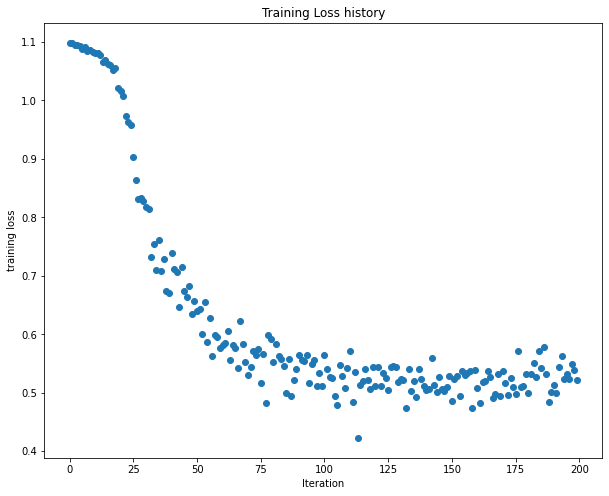

In [59]:
toy_X, toy_y, params = get_toy_data()

stats = nn_train(params, nn_loss_part2, nn_predict, toy_X, toy_y, toy_X, toy_y,
                 learning_rate=1e-1, reg=1e-6,
                 num_iters=200, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'], 'o')
plt.xlabel('Iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

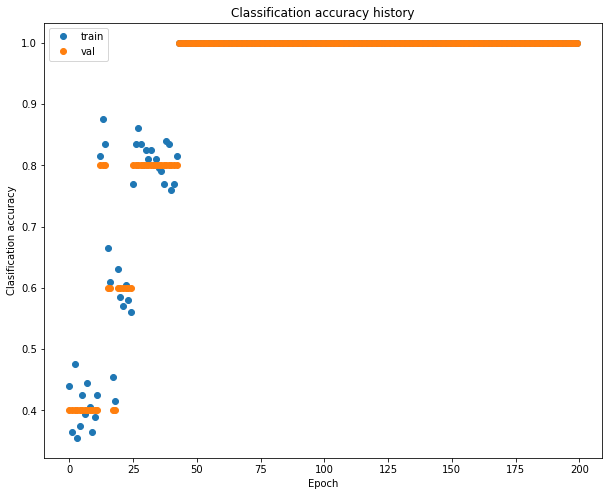

In [60]:
# Plot the loss function and train / validation accuracies
plt.plot(stats['train_acc_history'], 'o', label='train')
plt.plot(stats['val_acc_history'], 'o', label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

In [61]:
class TwoLayerNet(object):
  def __init__(self, input_size, hidden_size, output_size, device='cuda',
               std=1e-4):
    """
    Initialize the model. Weights are initialized to small random values and
    biases are initialized to zero. Weights and biases are stored in the
    variable self.params, which is a dictionary with the following keys:

    W1: First layer weights; has shape (D, H)
    b1: First layer biases; has shape (H,)
    W2: Second layer weights; has shape (H, C)
    b2: Second layer biases; has shape (C,)

    Inputs:
    - input_size: The dimension D of the input data.
    - hidden_size: The number of neurons H in the hidden layer.
    - output_size: The number of classes C.
    """
    # fix random seed before we generate a set of parameters
    coutils.utils.fix_random_seed()

    self.params = {}
    self.params['W1'] = std * torch.randn(input_size, hidden_size, device=device)
    self.params['b1'] = torch.zeros(hidden_size, device=device)
    self.params['W2'] = std * torch.randn(hidden_size, output_size, device=device)
    self.params['b2'] = torch.zeros(output_size, device=device)

  def _loss(self, params, X, y=None, reg=0.0):
    return nn_loss_part2(params, X, y, reg)
  
  def loss(self, X, y=None, reg=0.0):
    return self._loss(self.params, X, y, reg)


  def _train(self, params, loss_func, pred_func, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=5e-6, num_iters=100,
            batch_size=200, verbose=False):
    return nn_train(params, loss_func, pred_func, X, y, X_val, y_val,
            learning_rate, learning_rate_decay,
            reg, num_iters, batch_size, verbose)
    
  def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=5e-6, num_iters=100,
            batch_size=200, verbose=False):
    return self._train(self.params, self._loss, self._predict, 
                       X, y, X_val, y_val,
                       learning_rate, learning_rate_decay,
                       reg, num_iters, batch_size, verbose)

  def _predict(self, params, loss_func, X):
    return nn_predict(params, loss_func, X)
  
  def predict(self, X):
    return self._predict(self.params, self._loss, X)

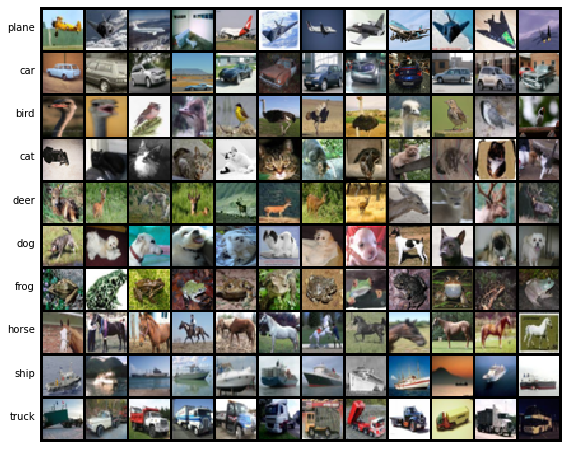

Train data shape:  torch.Size([47500, 3072])
Train labels shape:  torch.Size([47500])
Validation data shape:  torch.Size([2500, 3072])
Validation labels shape:  torch.Size([2500])
Test data shape:  torch.Size([10000, 3072])
Test labels shape:  torch.Size([10000])


In [62]:
def get_CIFAR10_data(validation_ratio = 0.05):
  """
  Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
  it for the linear classifier. These are the same steps as we used for the
  SVM, but condensed to a single function.  
  """
  X_train, y_train, X_test, y_test = coutils.data.cifar10()

  # load every data on cuda
  X_train = X_train.cuda()
  y_train = y_train.cuda()
  X_test = X_test.cuda()
  y_test = y_test.cuda()

  # 0. Visualize some examples from the dataset.
  class_names = [
      'plane', 'car', 'bird', 'cat', 'deer',
      'dog', 'frog', 'horse', 'ship', 'truck'
  ]
  img = coutils.utils.visualize_dataset(X_train, y_train, 12, class_names)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # 1. Normalize the data: subtract the mean RGB (zero mean)
  mean_image = X_train.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
  X_train -= mean_image
  X_test -= mean_image

  # 2. Reshape the image data into rows
  X_train = X_train.reshape(X_train.shape[0], -1)
  X_test = X_test.reshape(X_test.shape[0], -1)

  # 3. take the validation set from the training set
  # Note: It should not be taken from the test set
  # For random permumation, you can use torch.randperm or torch.randint
  # But, for this homework, we use slicing instead.
  num_training = int( X_train.shape[0] * (1.0 - validation_ratio) )
  num_validation = X_train.shape[0] - num_training

  # return the dataset
  data_dict = {}
  data_dict['X_val'] = X_train[num_training:num_training + num_validation]
  data_dict['y_val'] = y_train[num_training:num_training + num_validation]
  data_dict['X_train'] = X_train[0:num_training]
  data_dict['y_train'] = y_train[0:num_training]

  data_dict['X_test'] = X_test
  data_dict['y_test'] = y_test
  return data_dict

# Invoke the above function to get our data.
data_dict = get_CIFAR10_data()
print('Train data shape: ', data_dict['X_train'].shape)
print('Train labels shape: ', data_dict['y_train'].shape)
print('Validation data shape: ', data_dict['X_val'].shape)
print('Validation labels shape: ', data_dict['y_val'].shape)
print('Test data shape: ', data_dict['X_test'].shape)
print('Test labels shape: ', data_dict['y_test'].shape)

In [63]:
input_size = 3 * 32 * 32
hidden_size = 36
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(data_dict['X_train'], data_dict['y_train'],
                  data_dict['X_val'], data_dict['y_val'],
                  num_iters=500, batch_size=1000,
                  learning_rate=1e-2, learning_rate_decay=0.95,
                  reg=0.25, verbose=True)

# Predict on the validation set
y_val_pred = net.predict(data_dict['X_val'])
val_acc = 100.0 * (y_val_pred == data_dict['y_val']).float().mean().item()
print('Validation accuracy: %.2f%%' % val_acc)

iteration 0 / 500: loss 2.302864
iteration 100 / 500: loss 2.302708
iteration 200 / 500: loss 2.302672
iteration 300 / 500: loss 2.302584
iteration 400 / 500: loss 2.302634
Validation accuracy: 8.76%


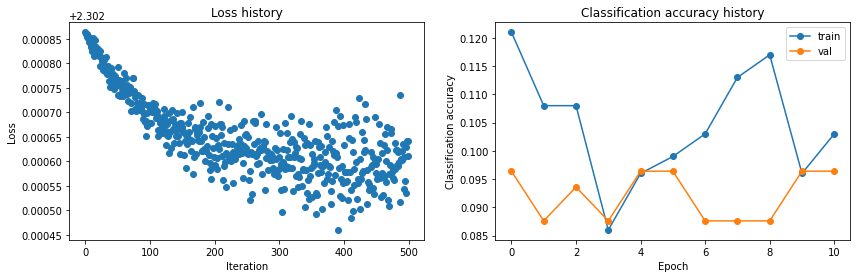

In [64]:
def plot_stats(stat_dict):
    plt.subplot(1,2,1)
    plt.plot(stat_dict['loss_history'], 'o')
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(1,2,2)
    plt.plot(stat_dict['train_acc_history'], 'o-', label='train')
    plt.plot(stat_dict['val_acc_history'], 'o-', label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Classification accuracy')
    plt.legend()

    plt.gcf().set_size_inches(14,4)
    plt.show()
    
plot_stats(stats)

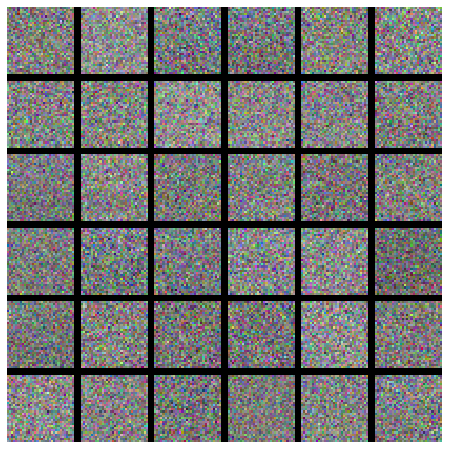

In [65]:
def visualize_grid(Xs, ubound=255.0, padding=1):
  """
  Reshape a 4D tensor of image data to a grid for easy visualization.

  Inputs:
  - Xs: Data of shape (N, H, W, C)
  - ubound: Output grid will have values scaled to the range [0, ubound]
  - padding: The number of blank pixels between elements of the grid
  """
  (N, H, W, C) = Xs.shape
  # print(Xs.shape)
  #math.ceil: 올림 함수(참고로 math.floor() 내림, round() 내장함수: 반올림)
  grid_size = int(math.ceil(math.sqrt(N)))
  grid_height = H * grid_size + padding * (grid_size - 1)
  grid_width = W * grid_size + padding * (grid_size - 1)
  grid = torch.zeros((grid_height, grid_width, C), device=Xs.device)
  next_idx = 0
  y0, y1 = 0, H
  for y in range(grid_size):
    x0, x1 = 0, W
    for x in range(grid_size):
      if next_idx < N:
        img = Xs[next_idx]
        low, high = torch.min(img), torch.max(img)
        grid[y0:y1, x0:x1] = ubound * (img - low) / (high - low)
        # grid[y0:y1, x0:x1] = Xs[next_idx]
        next_idx += 1
      x0 += W + padding
      x1 += W + padding
    y0 += H + padding
    y1 += H + padding
  # print(grid.shape)
  return grid


# Visualize the weights of the network
def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(3, 32, 32, -1).transpose(0, 3)
  plt.imshow(visualize_grid(W1, padding=3).type(torch.uint8).cpu())
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

In [66]:
def plot_acc_curves(stat_dict):
  plt.subplot(1, 2, 1)
  for key, single_stats in stat_dict.items():
    plt.plot(single_stats['train_acc_history'], label=str(key))
  plt.title('Train accuracy history')
  plt.xlabel('Epoch')
  plt.ylabel('Clasification accuracy')

  plt.subplot(1, 2, 2)
  for key, single_stats in stat_dict.items():
    plt.plot(single_stats['val_acc_history'], label=str(key))
  plt.title('Validation accuracy history')
  plt.xlabel('Epoch')
  plt.ylabel('Clasification accuracy')
  plt.legend()

  plt.gcf().set_size_inches(14, 5)
  plt.show()

train with hidden size: 2
train with hidden size: 8
train with hidden size: 32
train with hidden size: 128
train with hidden size: 512


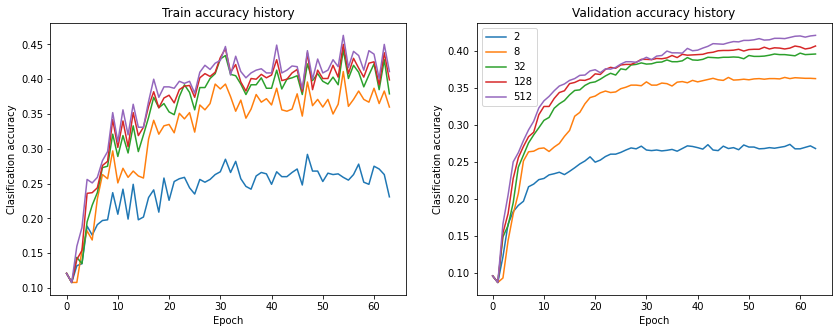

In [67]:
hidden_sizes = [2, 8, 32, 128, 512] 
lr = 0.1
reg = 0.001

stat_dict = {}
for hs in hidden_sizes:
  print('train with hidden size: {}'.format(hs))
  net = TwoLayerNet(3 * 32 * 32, hs, 10, device=data_dict['X_train'].device)
  stats = net.train(data_dict['X_train'], data_dict['y_train'], data_dict['X_val'], data_dict['y_val'],
            num_iters=3000, batch_size=1000,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)
  stat_dict[hs] = stats

plot_acc_curves(stat_dict)

train with regularization: 0
train with regularization: 1e-05
train with regularization: 0.0001
train with regularization: 0.001
train with regularization: 0.01
train with regularization: 0.1


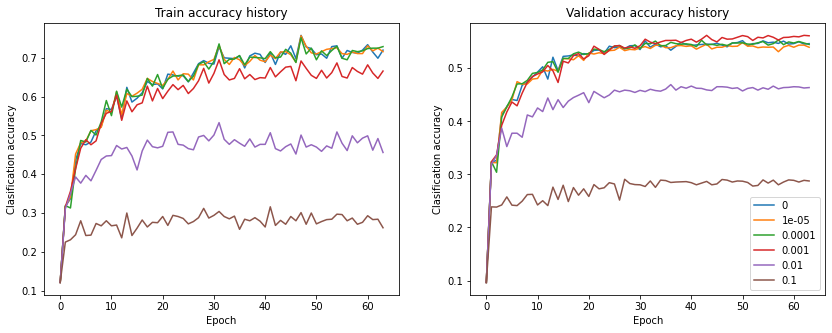

In [68]:
hs = 128
lr = 1.0
regs = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

stat_dict = {}
for reg in regs:
  print('train with regularization: {}'.format(reg))
  net = TwoLayerNet(3 * 32 * 32, hs, 10, device=data_dict['X_train'].device)
  stats = net.train(data_dict['X_train'], data_dict['y_train'], data_dict['X_val'], data_dict['y_val'],
            num_iters=3000, batch_size=1000,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)
  stat_dict[reg] = stats

plot_acc_curves(stat_dict)

train with learning rate: 0.001
train with learning rate: 0.01
train with learning rate: 0.1
train with learning rate: 1.0
train with learning rate: 10.0


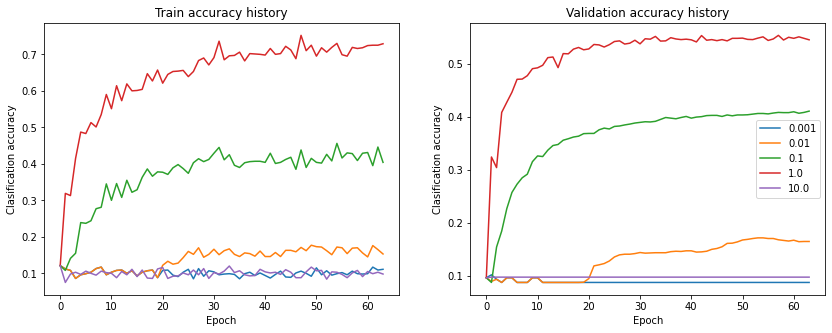

In [69]:
hs = 128
lrs = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
reg = 1e-4

stat_dict = {}
for lr in lrs:
  print('train with learning rate: {}'.format(lr))
  net = TwoLayerNet(3 * 32 * 32, hs, 10, device=data_dict['X_train'].device)
  stats = net.train(data_dict['X_train'], data_dict['y_train'], data_dict['X_val'], data_dict['y_val'],
            num_iters=3000, batch_size=1000,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)
  stat_dict[lr] = stats

plot_acc_curves(stat_dict)

In [73]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# Replace "pass" statement with your code
best_val = -1
best_h = 0
best_l = 0
best_r = 0
hidden_sizes = [400, 450, 500, 512, 550]
learning_rate = [1e-1, 3e-1, 5e-1, 7e-1, 9e-1, 1e0]
reg = [1e-5, 5e-5, 7e-5, 9e-5, 1e-4, 3e-4, 5e-4, 7e-4]
for h in hidden_sizes:
    for l in learning_rate:
        for r in reg:
            model = TwoLayerNet(3*32*32,h,10,device=data_dict['X_train'].device)
            model.train(data_dict['X_train'], data_dict['y_train'], data_dict['X_val'], data_dict['y_val'],
            learning_rate=l, learning_rate_decay=0.95,
            reg=r, num_iters=2000,
            batch_size=200, verbose=False)
            val_acc = (model.predict(data_dict['X_val']) == data_dict['y_val']).float().mean().item()
            if val_acc > best_val:
                best_val = val_acc
                best_net = model
                best_l = l
                best_h = h
                best_r = r

print("best h is %e, l is %e, r is %e, best_val is %f" %(best_h, best_l, best_r, best_val))    
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

best h is 4.000000e+02, l is 5.000000e-01, r is 5.000000e-05, best_val is 0.556400


In [74]:
# Check the validation-set accuracy of your best model
y_val_preds = best_net.predict(data_dict['X_val'])
val_acc = 100 * (y_val_preds == data_dict['y_val']).float().mean().item()
print('Best val-set accuracy: %.2f%%' % val_acc)

Best val-set accuracy: 55.64%


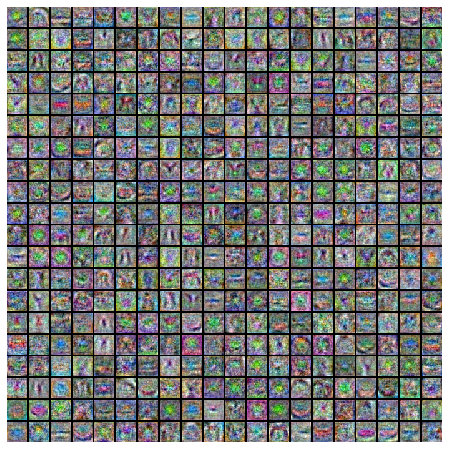

In [75]:
show_net_weights(best_net)

In [76]:

y_test_preds = best_net.predict(data_dict['X_test'])
test_acc = 100 * (y_test_preds == data_dict['y_test']).float().mean().item()
print('Test accuracy: %.2f%%' % test_acc)

Test accuracy: 52.91%
